In [87]:
import pandas as pd
import plotly.express as px
import folium
df = pd.read_csv("train.csv")
df1 = df.copy()

# convertendo Delivery_person_Age para int
linhas_selecionadas = df1['Delivery_person_Age'] != 'NaN '
df1 = df1.loc[linhas_selecionadas, :].copy()
df1['Delivery_person_Age'] = df1['Delivery_person_Age'].astype(int)

# convertendo Delivery_person_Ratings para float
df1['Delivery_person_Ratings'] = df1['Delivery_person_Ratings'].astype(float)

# convertendo Order_Date para datetime
df1['Order_Date'] = pd.to_datetime(df1['Order_Date'], format=('%d-%m-%Y'))

# convertendo multiple_deliveries para int
linhas_selecionadas = df1['multiple_deliveries'] != 'NaN '
df1 = df1.loc[linhas_selecionadas, :].copy()
df1['multiple_deliveries'] = df1['multiple_deliveries'].astype(int)

# removendo espacos dentro de strings
df1.loc[:, 'ID'] = df1.loc[:, 'ID'].str.strip()
df1.loc[:, 'Road_traffic_density'] = df1.loc[:, 'Road_traffic_density'].str.strip()
df1.loc[:, 'Type_of_order'] = df1.loc[:, 'Type_of_order'].str.strip()
df1.loc[:, 'Type_of_vehicle'] = df1.loc[:, 'Type_of_vehicle'].str.strip()
df1.loc[:, 'City'] = df1.loc[:, 'City'].str.strip()

#removendo linhas 'NaN' do Road_traffic_density
df1 = df1.loc[df1['Road_traffic_density'] != 'NaN', :]

#removendo linhas 'NaN' do City
df1 = df1.loc[df1['City'] != 'NaN', :]

# Exercicios

## Do lado da empresa:


### 1. Quantidade de pedidos por dia.


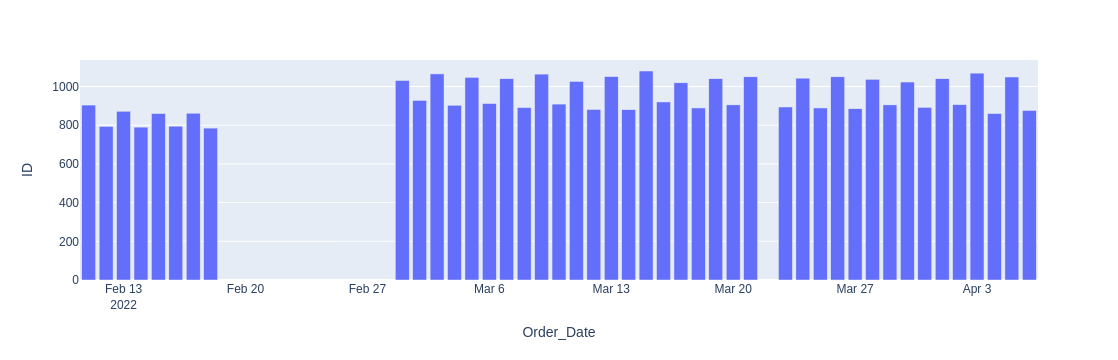

In [88]:
cols = ['ID', 'Order_Date']
df_aux = df1.loc[:, cols].groupby(['Order_Date']).count().reset_index()

px.bar(df_aux, x='Order_Date', y='ID')



In [89]:
df1.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


### 2. Quantidade de pedidos por semana.


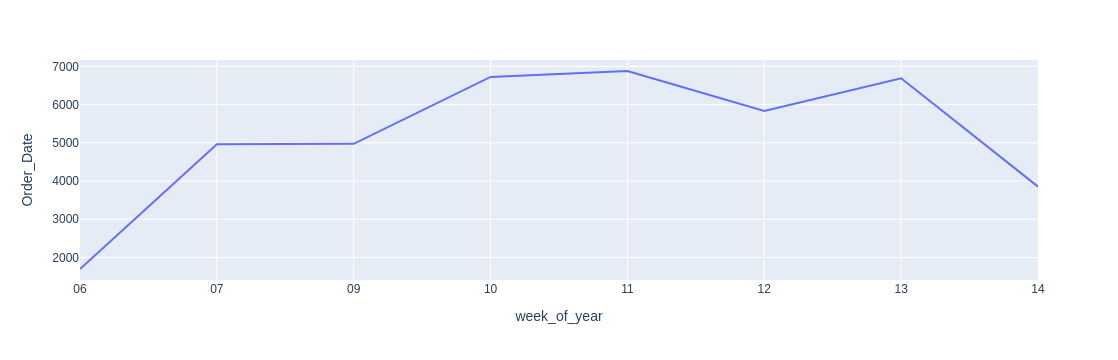

In [90]:
df1['week_of_year'] = df1['Order_Date'].dt.strftime('%U')

df_aux = df1.loc[:, ['week_of_year', 'Order_Date']].groupby(['week_of_year']).count().reset_index()
px.line(df_aux, x='week_of_year', y='Order_Date')


### 3. Distribuição dos pedidos por tipo de tráfego.


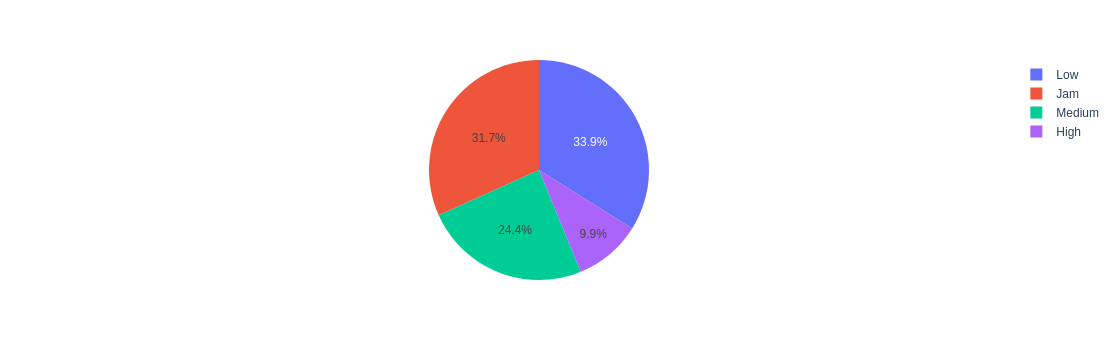

In [91]:
df_aux = df1.loc[:, ['ID', 'Road_traffic_density']].groupby(['Road_traffic_density']).count().reset_index()
df_aux['delivery_perc'] = df_aux['ID']/df_aux['ID'].sum()
px.pie(df_aux, values='delivery_perc', names='Road_traffic_density')

In [92]:
df1.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),week_of_year
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,...,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24,11
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,...,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33,12
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,...,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26,11
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,...,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21,14
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,...,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30,12


### 4. Comparação do volume de pedidos por cidade e tipo de tráfego.


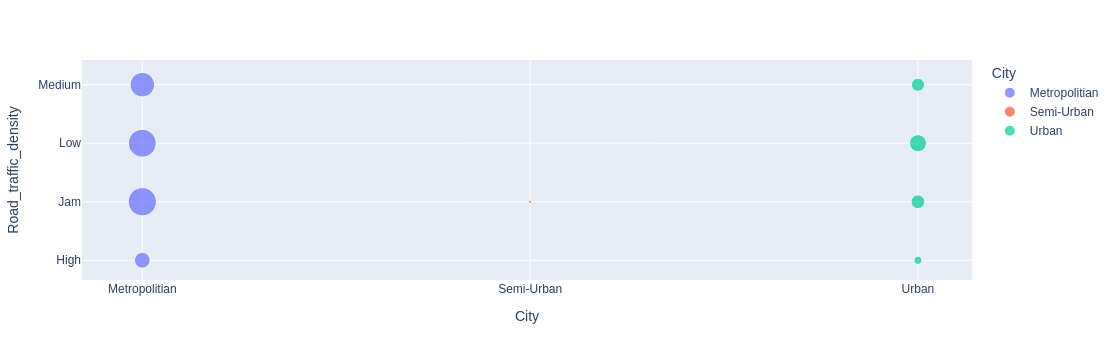

In [93]:
df_aux = df1.loc[:, ['ID', 'City', 'Road_traffic_density']].groupby(['City', 'Road_traffic_density']).count().reset_index()
px.scatter(df_aux, x='City', y='Road_traffic_density', size='ID', color='City')

### 5. A quantidade de pedidos por entregador por semana.

In [94]:
df_aux1 = df1.loc[:, ['week_of_year', 'ID']].groupby(['week_of_year']).count().reset_index()
df_aux2 = df1.loc[:, ['week_of_year', 'Delivery_person_ID']].groupby(['week_of_year']).nunique().reset_index()

df_aux = pd.merge( df_aux1, df_aux2, how='inner')
df_aux['order_by_deliver'] = df_aux['ID'] / df_aux['Delivery_person_ID']
px.line(df_aux, x='week_of_year', y='order_by_deliver')

### 6. A localização central de cada cidade por tipo de tráfego.

In [115]:
df_aux = df1.loc[:, ['City', 'Road_traffic_density', 'Delivery_location_latitude', 'Delivery_location_longitude']].groupby(['City', 'Road_traffic_density']).median().reset_index()

map = folium.Map()

for index, location_info in df_aux.iterrows():
    folium.Marker([location_info['Delivery_location_latitude'], 
                   location_info['Delivery_location_longitude']], 
                   popup=location_info[['City', 'Road_traffic_density']]).add_to(map)

map